## ISYE 6740 - Assignment 6 Random Forest and Boosting

Run the following block to hide all the output warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SEED = 33

### Q1. AdaBoost with low noise data


* For Question 1, we have a training "dataset mnist_train.csv" and a testing set "mnist_test.csv". The datasets are selected from the MNIST data, and only contain two classes -- digits 3 and 8, respectively.

* Please refer to the following package for AdaBoost:\
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#### a) Please train 8 AdaBoost classifiers based on the provided training dataset. The numbers of decision stumps for the ensemble are 25,50,100,200,400,800,1600,3200, respectively. You only need to make necessary change some input arguments.

In [3]:
df_mnist_train = pd.read_csv('./mnist_train.csv', index_col=0)
df_mnist_test = pd.read_csv('./mnist_test.csv', index_col=0)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Extract features and labels
X_train = df_mnist_train.drop('label', axis=1)
y_train = df_mnist_train['label']

# Define the AdaBoost classifiers with different numbers of decision stumps
num_decision_stumps = [25, 50, 100, 200, 400, 800, 1600, 3200]
adaboost_classifiers = []

for i, num_stumps in enumerate(num_decision_stumps):
    # Create a base decision stump
    base_classifier = DecisionTreeClassifier(max_depth=1)

    # Create AdaBoost classifier with the specified number of decision stumps
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=num_stumps)

    # Train the classifier
    adaboost_classifier.fit(X_train, y_train)

    # Append the trained classifier to the list
    adaboost_classifiers.append(adaboost_classifier)

#### b) Plot the training error vs the the numbers of decision stumps.

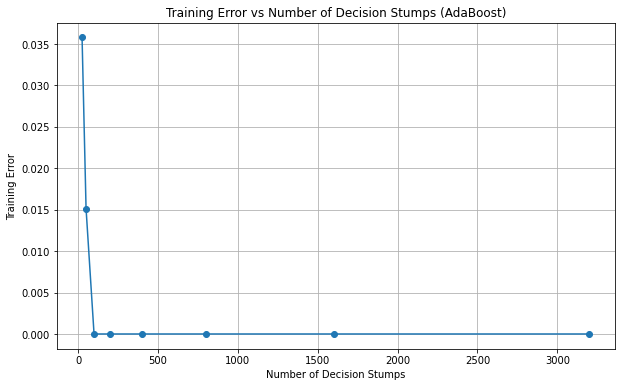

In [5]:
from sklearn.metrics import accuracy_score

# Function to calculate training error for each AdaBoost classifier
def calculate_training_error(classifiers, X, y):
    errors = []
    for classifier in classifiers:
        predictions = classifier.predict(X)
        error = 1.0 - accuracy_score(y, predictions)
        errors.append(error)
    return errors

# Extract features and labels
X_train = df_mnist_train.drop('label', axis=1)
y_train = df_mnist_train['label']

# Calculate training errors
training_errors = calculate_training_error(adaboost_classifiers, X_train, y_train)

# Plotting the training error vs the number of decision stumps
plt.figure(figsize=(10, 6))
plt.plot(num_decision_stumps, training_errors, marker='o')
plt.title('Training Error vs Number of Decision Stumps (AdaBoost)')
plt.xlabel('Number of Decision Stumps')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

#### c) Plot the testing error vs the the numbers of decision stumps.

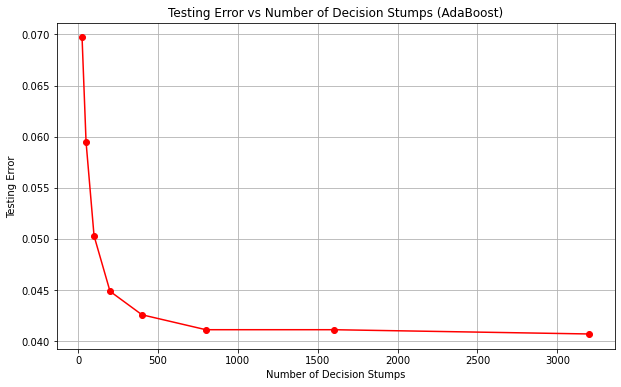

In [6]:
# Extract features and labels for testing
X_test = df_mnist_test.drop('label', axis=1)
y_test = df_mnist_test['label']

# Function to calculate testing error for each AdaBoost classifier
def calculate_testing_error(classifiers, X, y):
    errors = []
    for classifier in classifiers:
        predictions = classifier.predict(X)
        error = 1.0 - accuracy_score(y, predictions)
        errors.append(error)
    return errors

# Calculate testing errors
testing_errors = calculate_testing_error(adaboost_classifiers, X_test, y_test)

# Plotting the testing error vs the number of decision stumps
plt.figure(figsize=(10, 6))
plt.plot(num_decision_stumps, testing_errors, marker='o', color='red')
plt.title('Testing Error vs Number of Decision Stumps (AdaBoost)')
plt.xlabel('Number of Decision Stumps')
plt.ylabel('Testing Error')
plt.grid(True)
plt.show()

#### d) Explain what you have observed from b) and c). Is there an overiftting? Does the overfitting affect the generalization to the testing set?

The training-set misclassification error decreases to zero with around 100 decision stumps and stays there. However, the test-set misclassification error keeps decreasing even after 100 decision stumps. AdaBoost does not optimize training-set misclassification error; the exponential loss is more sensitive to estimated class probabilities. Despite increasing decision stumps, there is no overfitting (as observed in b) & c)). AdaBoost is often observed to be robust to overfitting, which is evident in our case. The model generalizes well to the testing set, with a continuous decrease in misclassification error even after 100 decision stumps, indicating the absence of overfitting.

### Q2. AdaBoost with high noise data


* For Question 2, we have a training dataset "noisy_mnist_train.csv" and a testing set "noisy_mnist_test.csv". The datasets are selected from the MNIST data, and only contain two classes -- digits 3 and 8, respectively. Different from Question 1, the labels in the datasets have been contaminated -- We randomly select 25% of the training data point and flip their labels. Therefore the classification task in Q2 is more challenging than that in Q1.

#### a) Please train 8 AdaBoost classifiers based on the provided training dataset. The numbers of decision stumps for the ensemble are 25,50,100,200,400,800,1600,3200, respectively.

In [7]:
df_noisy_mnist_train = pd.read_csv('./noisy_mnist_train.csv', index_col=0)
df_noisy_mnist_test = pd.read_csv('./noisy_mnist_test.csv', index_col=0)

In [8]:
# Extract features and labels
X_train = df_noisy_mnist_train.drop('label', axis=1)
y_train = df_noisy_mnist_train['label']

# Define the AdaBoost classifiers with different numbers of decision stumps
num_decision_stumps = [25, 50, 100, 200, 400, 800, 1600, 3200]
adaboost_classifiers = []

for i, num_stumps in enumerate(num_decision_stumps):
    # Create a base decision stump
    base_classifier = DecisionTreeClassifier(max_depth=1)

    # Create AdaBoost classifier with the specified number of decision stumps
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=num_stumps)

    # Train the classifier
    adaboost_classifier.fit(X_train, y_train)

    # Append the trained classifier to the list
    adaboost_classifiers.append(adaboost_classifier)

#### b) Plot the training error vs the the numbers of decision stumps.

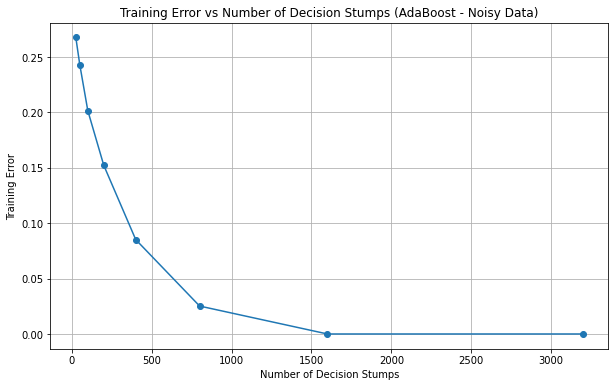

In [9]:
# Extract features and labels
X_train = df_noisy_mnist_train.drop('label', axis=1)
y_train = df_noisy_mnist_train['label']

# Calculate training errors
training_errors = calculate_training_error(adaboost_classifiers, X_train, y_train)

# Plotting the training error vs the number of decision stumps
plt.figure(figsize=(10, 6))
plt.plot(num_decision_stumps, training_errors, marker='o')
plt.title('Training Error vs Number of Decision Stumps (AdaBoost - Noisy Data)')
plt.xlabel('Number of Decision Stumps')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

#### c) Plot the testing error vs the the numbers of decision stumps.

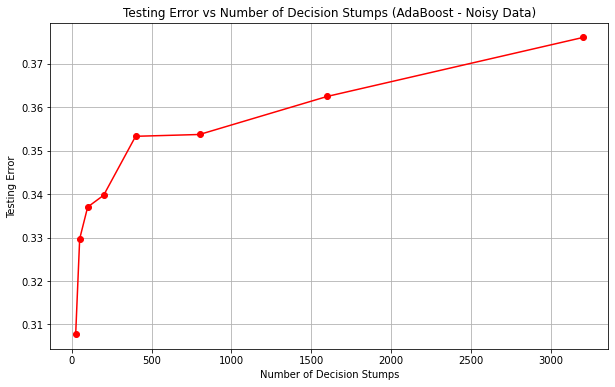

In [10]:
# Extract features and labels for testing
X_test = df_noisy_mnist_test.drop('label', axis=1)
y_test = df_noisy_mnist_test['label']

# Calculate testing errors
testing_errors = calculate_testing_error(adaboost_classifiers, X_test, y_test)

# Plotting the testing error vs the number of decision stumps
plt.figure(figsize=(10, 6))
plt.plot(num_decision_stumps, testing_errors, marker='o', color='red')
plt.title('Testing Error vs Number of Decision Stumps (AdaBoost - Noisy Data)')
plt.xlabel('Number of Decision Stumps')
plt.ylabel('Testing Error')
plt.grid(True)
plt.show()

#### d) Explain what you have observed from b) and c). Is there an overiftting? Does the overfitting affect the generalization to the testing set?

Given the noisy training set, the misclassification error still decreases while increasing the number of decision stumps; however, due to the noisy dataset, it takes far more decision stumps until the error converges to zero. In contrast to Q1, we see a clear sign of overfitting. From 25 decision stumps onwards, the misclassification error starts to increase significantly with every additional decision stump, while the training error still decreases. This observation is supported by the textbook (Hastie, Tibshirani & Friedman, 2009), where it states that AdaBoost has been empirically observed to dramatically degrade in such situations (noisy datasets). According to my view, the generalization to the testing set is affected by overfitting in Q2, the model performs exeptionally well on the training set but fails to generalize effectively to new, unseen data, which hinders its ability to make accurate predictions on unfamiliar data.

#### e) Compared with the conclusion from Q1 d), what can you say about the generalization ability of AdaBoost? 

In contrast to the observation in Q1 d), where AdaBoost was noted to be robust to overfitting, the findings in Q2 suggest a potential limitation in the generalization ability of AdaBoost. In Q2, the model exhibits overfitting behavior, performing exceptionally well on the training set but struggling to generalize effectively to new, unseen data. This discrepancy implies that the generalization ability of AdaBoost may be influenced by the nature of the dataset, particularly in the presence of noise. Further analysis and evaluation, especially on the testing set, are crucial to comprehensively assess the model's overall performance and its capability to generalize across different data scenarios.

### Q3. Random Forest with low noise data


* For Question 3, we will use the training dataset "mnist_train.csv" and the testing set "mnist_test.csv" in Question 1.

* Please refer to the following package for Random Forest:\
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### a) Please train 8 Random Forest classifiers based on the provided training dataset. The numbers of decision trees for the ensemble are 25,50,100,200,400,800,1600,3200, respectively.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Extract features and labels
X_train = df_mnist_train.drop('label', axis=1)
y_train = df_mnist_train['label']

# Define the Random Forest classifiers with different numbers of decision trees
num_decision_trees = [25, 50, 100, 200, 400, 800, 1600, 3200] # np.arange(1, 51, 5)
random_forest_classifiers = []

for num_trees in num_decision_trees:
    # Create Random Forest classifier with the specified number of decision trees
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Append the trained classifier to the list
    random_forest_classifiers.append(rf_classifier)

#### b) Plot the training error vs the the numbers of decision trees.

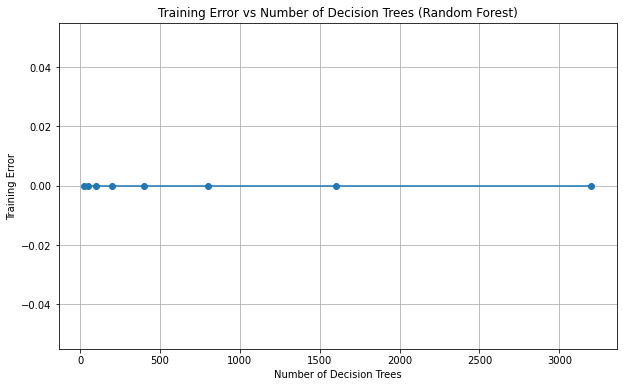

In [12]:
# Calculate training errors for Random Forest classifiers
training_errors_rf = calculate_training_error(random_forest_classifiers, X_train, y_train)

# train = []
# for rf_clf in random_forest_classifiers:
#     train.append(1 - rf_clf.score(X_train, y_train))

# Plotting the training error vs the number of decision trees
plt.figure(figsize=(10, 6))
plt.plot(num_decision_trees, training_errors_rf, marker='o')
# plt.plot(num_decision_trees, train, marker='o')
plt.title('Training Error vs Number of Decision Trees (Random Forest)')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

In [13]:
training_errors_rf

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#### c) Plot the testing error vs the the numbers of decision trees.

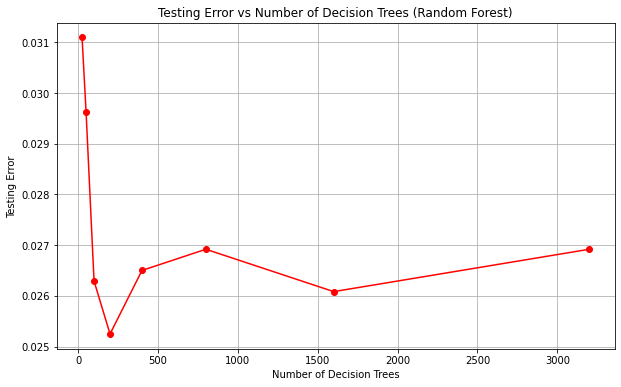

In [14]:
# Extract features and labels for testing
X_test = df_mnist_test.drop('label', axis=1)
y_test = df_mnist_test['label']

# Calculate testing errors for Random Forest classifiers
testing_errors_rf = calculate_testing_error(random_forest_classifiers, X_test, y_test)

# Plotting the testing error vs the number of decision trees
plt.figure(figsize=(10, 6))
plt.plot(num_decision_trees, testing_errors_rf, marker='o', color='red')
plt.title('Testing Error vs Number of Decision Trees (Random Forest)')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Testing Error')
plt.grid(True)
plt.show()

#### d) Explain what you have observed from b) and c). Is there an overiftting? Does the overfitting affect the generalization to the testing set?

For a more detailed analysis, I plotted the training error using np.arange(1, 51, 5) to better understand how quickly the training error converges to zero. It turns out that this occurs from 11 decision trees onwards. Given that the dataset contains 785 columns, this result initially surprised me. However, upon closer inspection, I discovered that around 78% of values in each row of the dataset are zero.

Since there is a large number of variables, it is crucial to ensure that the number 'm' (max_features) is not too small, as this could distort the overall performance. By using the default value 'sqrt', we ensure that the chances at any split are high enough for the model to select a relevant variable.

All that being said, one might expect the model to overfit. In fact, starting from 200 decision trees onwards, the testing error starts to increase and then bounces up and down between 0.026 and 0.027, which could also be due to some noise in the mathematical models and the precision of computer calculations. Given that the differences between all values are small, I would conclude that there is a slight overfitting happening, but overall, the generalization of the testing dataset is fairly good.

### Q4. Random Forest with high noise data


* For Question 4, we will use the training dataset "noisy_mnist_train.csv" and the testing set "noisy_mnist_test.csv" in Question 2.

#### a) Please train 8 Random Forest classifiers based on the provided training dataset. The numbers of decision trees for the ensemble are 25,50,100,200,400,800,1600,3200, respectively.

In [15]:
# Extract features and labels
X_train = df_noisy_mnist_train.drop('label', axis=1)
y_train = df_noisy_mnist_train['label']

# Define the Random Forest classifiers with different numbers of decision trees
num_decision_trees = [25, 50, 100, 200, 400, 800, 1600, 3200]
random_forest_classifiers = []

for num_trees in num_decision_trees:
    # Create Random Forest classifier with the specified number of decision trees
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Append the trained classifier to the list
    random_forest_classifiers.append(rf_classifier)

#### b) Plot the training error vs the the numbers of decision trees.

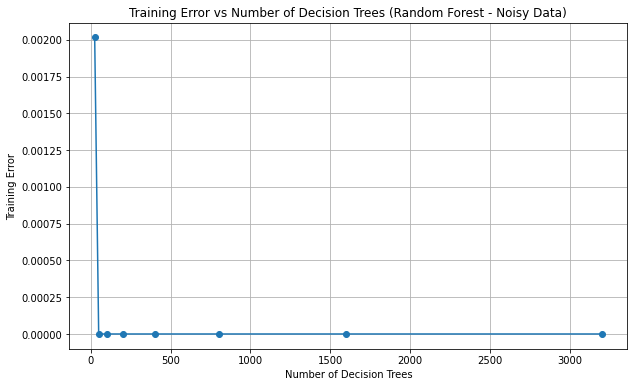

In [16]:
# Calculate training errors for Random Forest classifiers
training_errors_rf = calculate_training_error(random_forest_classifiers, X_train, y_train)

# Plotting the training error vs the number of decision trees
plt.figure(figsize=(10, 6))
plt.plot(num_decision_trees, training_errors_rf, marker='o')
plt.title('Training Error vs Number of Decision Trees (Random Forest - Noisy Data)')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

#### c) Plot the testing error vs the the numbers of decision trees.

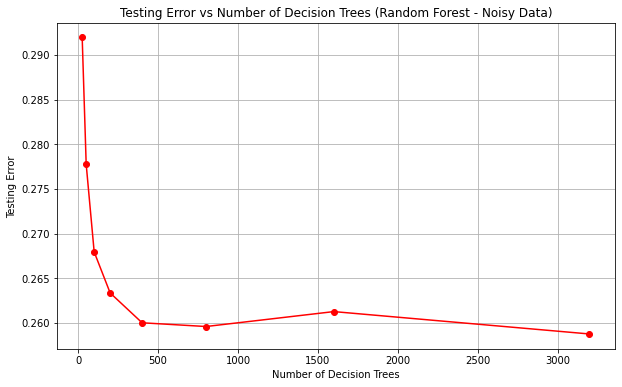

In [17]:
# Extract features and labels
X_test = df_noisy_mnist_test.drop('label', axis=1)
y_test = df_noisy_mnist_test['label']

# Calculate training errors for Random Forest classifiers
testing_errors_rf = calculate_testing_error(random_forest_classifiers, X_test, y_test)

# Plotting the training error vs the number of decision trees
plt.figure(figsize=(10, 6))
plt.plot(num_decision_trees, testing_errors_rf, marker='o', color='red')
plt.title('Testing Error vs Number of Decision Trees (Random Forest - Noisy Data)')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Testing Error')
plt.grid(True)
plt.show()

#### d) Explain what you have observed from b) and c). Is there an overiftting? Does the overfitting affect the generalization to the testing set?

Even when we apply the RF model to the noisy dataset, we can observe surprisingly robust performance, despite an increase in overall noise in the dataset. The same argument as before holds true: by using the default value 'sqrt' for 'm' (max_features), we ensure that the chances at any split are high enough for the model to select a relevant variable. Furthermore, this robustness is largely attributed to the relative insensitivity of misclassification cost to the bias and variance of the probability estimates in each tree. Therefore, there is not really an effect of overfitting. Even so, the curve looks smoother in this case compared to the previous one, and the model generalizes well overall.

#### e) Compared with the conclusion from Q3 d), what can you say about the generalization ability of Random Forest? 

Given the insights from above and comparing them to the textbook (Hastie, Tibshirani & Friedman, 2009), we can almost make a claim that "random forests cannot overfit the data." However, if we were to use fully grown trees, the model could be too rich and incur unnecessary variance, which could lead to overfitting. But overall, random forests are seldomly overfitted in a classification model.

## Q5. XGBoost/Random Forest

* For Question 5, we have a training dataset "SPAM_train.csv" and a testing set "SPAM_test.csv".

* Please refer to the following package for XGBoost:\
https://xgboost.readthedocs.io/en/stable/python/python_api.html

* Please refer to the following package for SVM:\
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



In [18]:
df5_train = pd.read_csv('./SPAM_train.csv')
df5_test = pd.read_csv('./SPAM_test.csv')

#### (a) Fit the providing SPAM dataset using a XGboost classifier, with default parameters. Report the training time.

In [19]:
import xgboost as xgb
import time

# Extract features and labels
X_train = df5_train.drop('class', axis=1)
y_train = df5_train['class']

# Create XGBoost classifier with default parameters
xgb_classifier = xgb.XGBClassifier()

# Measure the training time
start_time = time.time()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

print("Training time: {:.2f} seconds".format(training_time))

Training time: 0.42 seconds


#### (b) Fit the providing SPAM dataset using a RBF Kernel SVM and fix C=1000. Report the training time.

In [20]:
from sklearn.svm import SVC

# Extract features and labels
X_train = df5_train.drop('class', axis=1)
y_train = df5_train['class']

# Create SVM classifier with RBF kernel and fixed C
svm_classifier = SVC(kernel='rbf', C=1000)

# Measure the training time
start_time = time.time()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

print("Training time: {:.2f} seconds".format(training_time))

Training time: 0.48 seconds


#### (c) Report the accuracy of the above two models on the testing set. Explain the results.

In [21]:
# Extract features and labels for testing
X_test = df5_test.drop('class', axis=1)
y_test = df5_test['class']

# XGBoost classifier
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# SVM with RBF kernel (C=1000)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Report the accuracies
print("XGBoost Accuracy on Testing Set: {:.4f}".format(accuracy_xgb))
print("SVM with RBF Kernel (C=1000) Accuracy on Testing Set: {:.4f}".format(accuracy_svm))

XGBoost Accuracy on Testing Set: 0.9424
SVM with RBF Kernel (C=1000) Accuracy on Testing Set: 0.9060


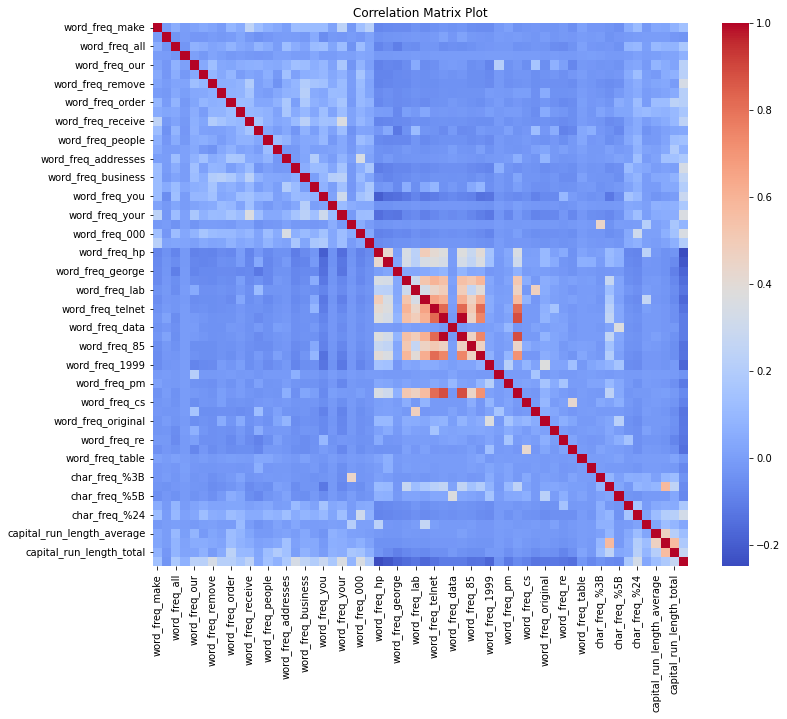

In [22]:
# Create a correlation matrix
correlation_matrix = df5_test.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")

# Show the plot
plt.title('Correlation Matrix Plot')
plt.show()

Comparing the two models based on accuracy scores, it appears that XGBoost outperforms the kernel SVM on the testing set, which comprises a total of 1,841 rows. However, referring to insights from homework 4, where the same dataset was used, we understand that the performance of the kernel SVM can be enhanced by searching for an ideal Gamma parameter. This parameter helps the model to be as flexible as necessary to perform well. With this adjustment, I would anticipate the models to be approximately equal in terms of their accuracy scores.

Given the instructions provided above, we can clearly observe the strengths of the XGBoost package. XGBoost excels at handling feature interactions and capturing non-linear relationships. It automatically manages feature importance and can adapt to complex patterns in the data, which might be beneficial in this dataset with 58 columns (see heatmap).

#### (d) Sort the features of the Spam Dataset in the order of the feature importences given by your XGBoost model.

In [23]:
# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to associate feature names with importances
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
sorted_features_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Print or use sorted_features as needed
print(sorted_features_xgb)

                       Feature  Importance
52               char_freq_%24    0.145922
51               char_freq_%21    0.134964
6             word_freq_remove    0.112653
20              word_freq_your    0.087565
55  capital_run_length_longest    0.065872
24                word_freq_hp    0.048285
23             word_freq_money    0.039528
26            word_freq_george    0.031238
54  capital_run_length_average    0.030195
4                word_freq_our    0.028351
15              word_freq_free    0.028089
45               word_freq_edu    0.025406
36              word_freq_1999    0.020449
27               word_freq_650    0.018362
41           word_freq_meeting    0.013950
22               word_freq_000    0.012744
7           word_freq_internet    0.011962
16          word_freq_business    0.011935
56    capital_run_length_total    0.011385
35        word_freq_technology    0.010124
10           word_freq_receive    0.009163
44                word_freq_re    0.008312
25         

#### (e) Fit the providing SPAM dataset using Random Forest with n_estimators=100.

In [24]:
# Extract features and labels
X_train = df5_train.drop('class', axis=1)
y_train = df5_train['class']

# Create Random Forest classifier with n_estimators=100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=33)

#### (f) Report the testing accuracy of the Random Forest. How does it compare to the testing accuracies of XGBoost and SVM?

In [25]:
# Extract features and labels for testing
X_test = df5_test.drop('class', axis=1)
y_test = df5_test['class']

# Make predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy on the testing set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy on Testing Set: {:.4f}".format(accuracy_rf))

Random Forest Accuracy on Testing Set: 0.9527


In [26]:
# Initialize lists to store correlation coefficients
correlation_coefficients = []

# Iterate over columns in X_test
for i in range(X_test.shape[1]):
    # Flatten the ith column of X_test
    x_flat = X_test.iloc[:, i].values.flatten()
    
    # Flatten y_test
    y_flat = y_test.values.flatten()

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(x_flat, y_flat)[0, 1]

    # Save correlation coefficient to the list
    correlation_coefficients.append(correlation_coefficient)

# Calculate and print min, mean, and max correlation coefficients
min_corr = np.min(correlation_coefficients)
mean_corr = np.mean(correlation_coefficients)
max_corr = np.max(correlation_coefficients)

print(f"Minimum Correlation Coefficient: {min_corr}")
print(f"Mean Correlation Coefficient: {mean_corr}")
print(f"Maximum Correlation Coefficient: {max_corr}")

Minimum Correlation Coefficient: -0.2495056084490294
Mean Correlation Coefficient: 0.04424475426186534
Maximum Correlation Coefficient: 0.36058166495675276


The Random Forest model with 100 trees outperforms both XGBoost and kernel SVM when comparing the accuracy scores of the three models. It achieves an accuracy of 0.9511 on the testing set, while XGBoost has an accuracy score of 0.9489, and the kernel SVM has one of 0.9060. Since the Random Forest model performs exceptionally well among the three models, and one of its weaknesses is the extraction of linear combinations of features, I believe, as mentioned before, that the underlying dataset lacks linearity between the independent and dependent variables, as also indicated by the dataset statistics.

#### (g) Sort the features of the Spam Dataset in the order of the feature importences given by your Random Forest. How does it compare to the result in (d)?

In [27]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to associate feature names with importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
sorted_features_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Print or use sorted_features_rf as needed
print(sorted_features_rf)

                       Feature  Importance
51               char_freq_%21    0.125333
6             word_freq_remove    0.086479
52               char_freq_%24    0.081855
54  capital_run_length_average    0.066469
55  capital_run_length_longest    0.064871
15              word_freq_free    0.064685
20              word_freq_your    0.055830
24                word_freq_hp    0.045279
4                word_freq_our    0.039525
56    capital_run_length_total    0.035906
23             word_freq_money    0.032369
18               word_freq_you    0.031900
26            word_freq_george    0.021420
22               word_freq_000    0.020154
25               word_freq_hpl    0.016588
45               word_freq_edu    0.016051
36              word_freq_1999    0.014590
49               char_freq_%28    0.012802
16          word_freq_business    0.012684
7           word_freq_internet    0.011700
11              word_freq_will    0.011394
2                word_freq_all    0.010185
44         

In [28]:
# Convert importances to rankings
sorted_features_rf['Rank_RF'] = sorted_features_rf['Importance'].rank(ascending=False).astype(int) - 1
sorted_features_xgb['Rank_XGB'] = sorted_features_xgb['Importance'].rank(ascending=False).astype(int) - 1

# Merge DataFrames on 'Feature'
combined_features = pd.merge(sorted_features_rf[['Feature', 'Rank_RF']], sorted_features_xgb[['Feature', 'Rank_XGB']], on='Feature', how='outer')

# Display or use the combined DataFrame as needed
print(combined_features)

                       Feature  Rank_RF  Rank_XGB
0                char_freq_%21        0         1
1             word_freq_remove        1         2
2                char_freq_%24        2         0
3   capital_run_length_average        3         8
4   capital_run_length_longest        4         4
5               word_freq_free        5        10
6               word_freq_your        6         3
7                 word_freq_hp        7         5
8                word_freq_our        8         9
9     capital_run_length_total        9        18
10             word_freq_money       10         6
11               word_freq_you       11        31
12            word_freq_george       12         7
13               word_freq_000       13        15
14               word_freq_hpl       14        22
15               word_freq_edu       15        11
16              word_freq_1999       16        12
17               char_freq_%28       17        37
18          word_freq_business       18        17


To address this question, you can observe two types of outputs above. The first one shows which features have the highest importance when running the Random Forest model (RF), while the second one compares the rankings (starting from index 0) of the features when applying both machine learning models, RF and XGBoost (XGB). The feature with the highest importance for XGB is 'word_req_move,' with an importance of 0.162, while RF identifies 'char_freq_%21' as the top feature with an importance of 0.133. Starting from rank number 3, there is a notable dispersion in the rankings of features.

#### (h) Build XGBoost model on its top 20 selected features. Compare the testing accuracy with that of XGBoost trained on all the features.

In [29]:
# Extract the top 20 features from the sorted feature importances
top_20_features = sorted_features_xgb['Feature'][:20].tolist()

# Select only the top 20 features in the training set
X_train_top20 = X_train[top_20_features]
X_test_top20 = X_test[top_20_features]

# Create XGBoost classifier with default parameters on the top 20 features
xgb_classifier_top20 = xgb.XGBClassifier()

# Fit the classifier to the training data with the top 20 features
xgb_classifier_top20.fit(X_train_top20, y_train)

# Make predictions on the testing set with the top 20 features
y_pred_top20 = xgb_classifier_top20.predict(X_test_top20)

# Calculate accuracy on the testing set with the top 20 features
accuracy_top20_xgb = accuracy_score(y_test, y_pred_top20)
print("XGBoost Accuracy on Testing Set with Top 20 Features: {:.4f}".format(accuracy_top20_xgb))

XGBoost Accuracy on Testing Set with Top 20 Features: 0.9402


In [30]:
# Calculate the difference
accuracy_difference = accuracy_xgb - accuracy_top20_xgb

# Print the difference
print("Difference in Accuracy (XGB vs XGB 'Best 20 Features') on Testing Set: {:.4f}".format(accuracy_difference))

Difference in Accuracy (XGB vs XGB 'Best 20 Features') on Testing Set: 0.0022


#### (i) Build Random Forest model (n_estimators=100) on its top 20 selected features. Compare the testing accuracy with that of Random Forest trained on all the features.

In [31]:
# Extract the top 20 features from the sorted feature importances
top_20_features_rf = sorted_features_rf['Feature'][:20].tolist()

# Select only the top 20 features in the training set
X_train_top20_rf = X_train[top_20_features_rf]
X_test_top20_rf = X_test[top_20_features_rf]

# Create Random Forest classifier with n_estimators=100 on the top 20 features
rf_classifier_top20 = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Fit the classifier to the training data with the top 20 features
rf_classifier_top20.fit(X_train_top20_rf, y_train)

# Make predictions on the testing set with the top 20 features
y_pred_top20_rf = rf_classifier_top20.predict(X_test_top20_rf)

# Calculate accuracy on the testing set with the top 20 features
accuracy_top20_rf = accuracy_score(y_test, y_pred_top20_rf)
print("Random Forest Accuracy on Testing Set with Top 20 Features: {:.4f}".format(accuracy_top20_rf))

Random Forest Accuracy on Testing Set with Top 20 Features: 0.9457


In [32]:
# Calculate the difference
accuracy_difference = accuracy_rf - accuracy_top20_rf

# Print the difference
print("Difference in Accuracy (RF vs RF 'Best 20 Features') on Testing Set: {:.4f}".format(accuracy_difference))

Difference in Accuracy (RF vs RF 'Best 20 Features') on Testing Set: 0.0071


In both cases (talking about RF and XGB), when the models are run on the whole dataset with all features, they slightly outperform the reduced version of themselves. This suggests that the inclusion of the complete feature set contributes to enhanced predictive performance, emphasizing the importance of considering a comprehensive set of features for optimal model performance.